In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet('output/sentiments.parquet')
df.shape

(96565, 5)

In [ ]:
import os

dfs = []
dir = 'output/topics'

In [2]:
#import os

#dfs = []

#dir = 'output/embeddings/topics/'

#for f in os.listdir(dir):
#    if f.endswith('.parquet'):
#        dfs.append(pd.read_parquet(dir + f))

#df_topics = pd.concat(dfs)
# remove duplicate index
#df_topics = df_topics[~df_topics.index.duplicated(keep='first')]
#df_topics.to_parquet('output/topics.parquet', index=True)

#df_topics

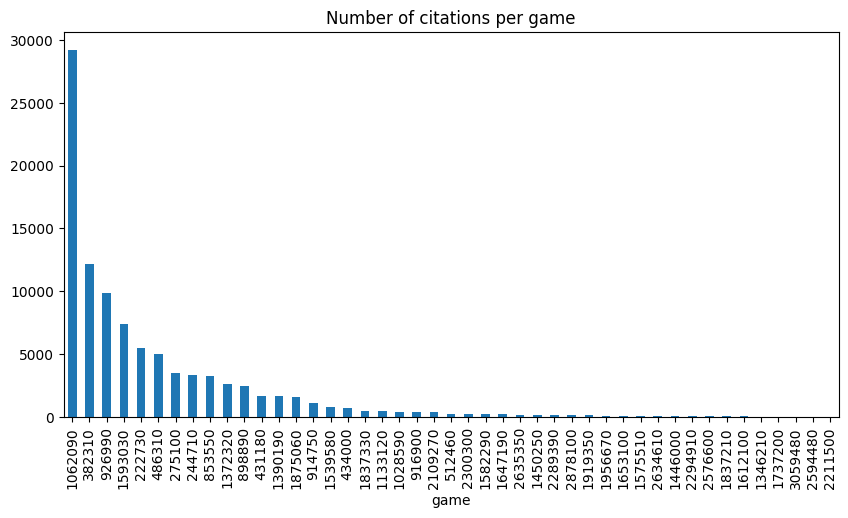

In [3]:
df.groupby('game').size().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Number of citations per game')
plt.show()

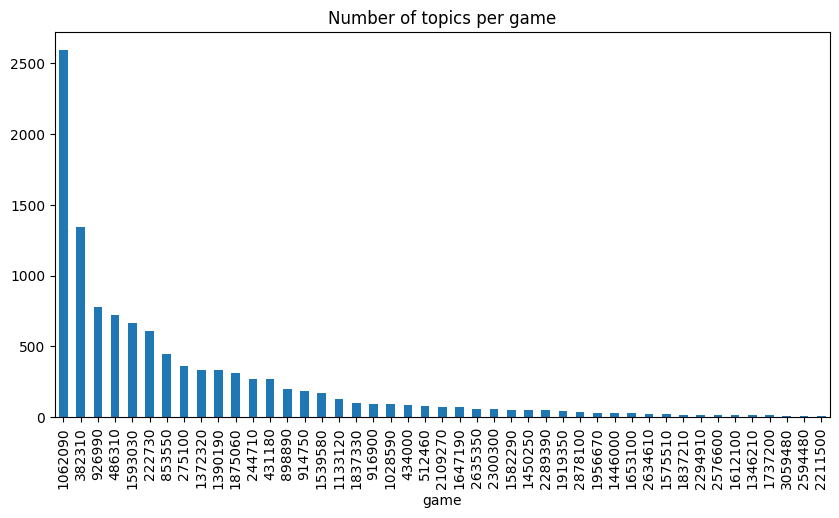

In [4]:
# Number of topics per game

df.groupby('game')['topic'].nunique().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Number of topics per game')
plt.show()

In [5]:
# Unique topics vs total topics

print('Unique topics:', df['topic'].nunique())
print('Sum of unique topics per game:', df.groupby('game')['topic'].nunique().sum())

Unique topics: 6520
Sum of unique topics per game: 10876


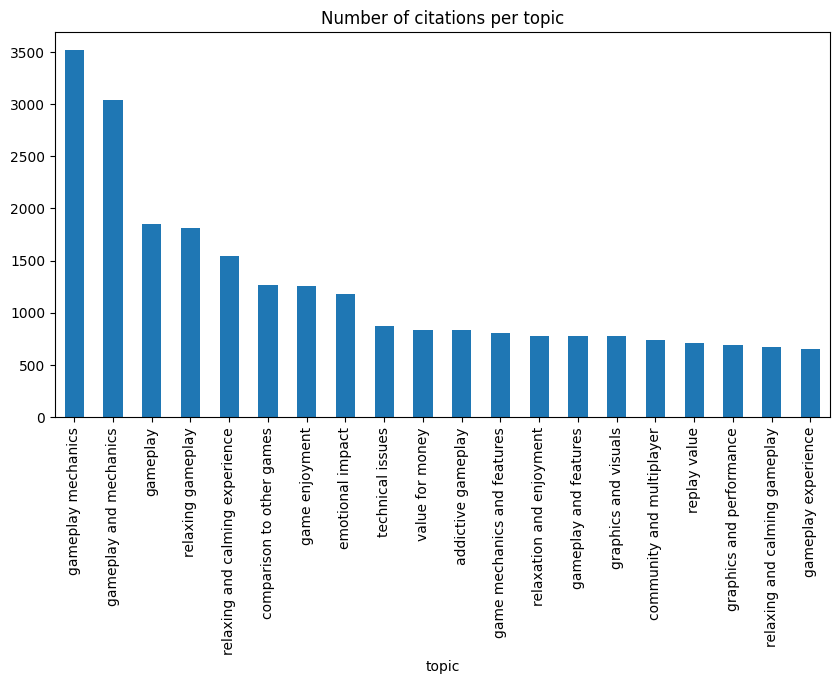

In [6]:
# TOP 20 topics with most citations

df.groupby('topic').size().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10, 5), title='Number of citations per topic')
plt.show()

In [7]:
# Top 10 topics by game

top_topics = df.groupby(['game', 'topic']).size().reset_index(name='count').sort_values(['game', 'count'], ascending=[True, False])

for name, group in top_topics.groupby('game'):
    print(name)
    print(group[['topic', 'count']].head(10))
    print('\n')


1028590
                                   topic  count
46                gameplay and mechanics     26
6                      bugs and glitches     25
38                        game potential     22
9              bugs and technical issues     16
23          early access and development     13
43                              gameplay     12
22                 early access and bugs      9
50               graphics and animations      9
67  overall enjoyment and recommendation      9
49       gameplay mechanics and features      8


1062090
                             topic  count
1421            gameplay mechanics   1240
1377        gameplay and mechanics    822
1181                game enjoyment    628
613      comparison to other games    594
115             addictive gameplay    537
485   city building and management    527
954              engaging gameplay    436
1361                      gameplay    429
1242   game mechanics and features    427
1400            gameplay enjoyment